# Importer les librairies

In [165]:
# INSTALLATION SI BESOIN
%pip install scipy
%pip install pandas
%pip install seaborn
%pip install matplotlib
%pip install statsmodels
%pip install scikit-learn


# IMPORTER LES LIBRAIRIES NECESSAIRES A L'ETUDE
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats


import statsmodels.api as sm

from sklearn.tree import DecisionTreeClassifier, plot_tree


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


# Importer les données

In [166]:
data = pd.read_csv("Data/titanic.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Questions

## 1. Préparation des données

Remplissez la function `preprocess` ci-dessus. Celle-ci doit:
1. Supprimez les colonnes `PassengerId`, `Name`, `Ticket`, `Cabin`.
2. Supprimez les lignes contenant au moins une valeur manquante.
3. Créer une variable `FamilySize` qui est correspond à `SibSp` + `Parch` + 1. Supprimez les variables `SibSp` et `Parch`.
4. Recalculer le prix du billet `Fare` en divisant `Fare` par `FamilySize`.
5. Encoder les variables qualitatives `Sex`, `Embarked` avec l'argument `drop_first=True`.

In [167]:
def preprocess(data: pd.DataFrame) -> pd.DataFrame:
    
    """La fonction prépare les données à l'analyse.
    
    Args:
        data (pd.DataFrame): La dataframe originale
        
    Returns:
        pd.DataFrame: La dataframe preprocessé et prête à être analysée.
    """
    
    # Faire une copy de la dataframe originale
    data_preprocessed = data.copy()
    
    # Supprimez les variables `PassengerId`, `Name`, `Ticket` & `Cabin`
    # ...
    data_preprocessed.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], inplace=True)

    # Supprimez lignes contenant au moins une valeur manquante
    # ...
    data_preprocessed = data_preprocessed.dropna(axis=0)    

    # Créer une variable `FamilySize` et supprimez les variables `SibSp` et `Parch`
    # ...
    data_preprocessed["FamilySize"] = data_preprocessed["SibSp"] + data_preprocessed["Parch"] + 1
    data_preprocessed.drop(columns=["SibSp", "Parch"], inplace=True)

    # Recalculer le prix du billet
    # ...
    data_preprocessed["Fare"] = data_preprocessed["Fare"] / data_preprocessed["FamilySize"]

    # Encode (OHE) `Sex` & `Embarked`
    # ...
    data_preprocessed = pd.get_dummies(data_preprocessed, columns=["Sex", "Embarked"], drop_first=True, dtype=int)
    
    # CHECK: NE PAS TOUCHER
    for col in ["PassengerId", "Name", "Ticket", "Cabin", "SibSp", "Parch"]:
        assert col not in data_preprocessed, f"{col} n'a pas été retiré."
    assert data_preprocessed.isna().sum().sum() == 0, "Il reste encore des NaN à supprimer."
    assert "FamilySize" in data_preprocessed.columns, "La colonne `FamilySize` n'a pas été créée."
    assert data_preprocessed.loc[0, "Fare"] == 3.625, "La colonne `Fare` n'a pas été recalculée."
    for col in [col for col in data_preprocessed if col.startswith("Embarked")]:
        assert data_preprocessed[col].nunique() == 2, f"{col} n'a pas été encodé."
    for col in [col for col in data_preprocessed if col.startswith("Sex")]:
        assert data_preprocessed[col].nunique() == 2, f"{col} n'a pas été encodé."
    
    return data_preprocessed

Le résultat de la function doit vous donner exactement le tableau ci-dessous.

In [168]:
# On display les datas clean    
data_clean = preprocess(data)
display(data_clean)

,Survived,Pclass,Age,Fare,FamilySize,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,3.625000,2,1,0,1
1,1,1,38.0,35.641650,2,0,0,0
2,1,3,26.0,7.925000,1,0,0,1
3,1,1,35.0,26.550000,2,0,0,1
4,0,3,35.0,8.050000,1,1,0,1
...,...,...,...,...,...,...,...,...
885,0,3,39.0,4.854167,6,0,1,0
886,0,2,27.0,13.000000,1,1,0,1
887,1,1,19.0,30.000000,1,0,0,1
889,1,1,26.0,30.000000,1,1,0,0


In [169]:
# Petit résumé des colonnes
data_clean.describe()

,Survived,Pclass,Age,Fare,FamilySize,Sex_male,Embarked_Q,Embarked_S
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,20.736106,1.946629,0.636236,0.039326,0.778090
std,0.491139,0.836854,14.492933,37.544783,1.485027,0.481420,0.194506,0.415823
min,0.000000,1.000000,0.420000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,7.318750,1.000000,0.000000,0.000000,1.000000
50%,0.000000,2.000000,28.000000,9.225000,1.000000,1.000000,0.000000,1.000000
75%,1.000000,3.000000,38.000000,26.000000,2.000000,1.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,512.329200,8.000000,1.000000,1.000000,1.000000


## 2. Inférence statistique (4 pts)

**Q1: L'âge moyen des passagers du Titanic est-il le même que l'âge moyen de la population en 1912 (28 ans)?**
==============


Q1.1: Identifier la ou les variables d'intérêt et spécifier le type.

**Variable**: Age  
**Type:** Quantitative continue


Q1.2: Réaliser une visualisation appropriée selon la ou les variables.


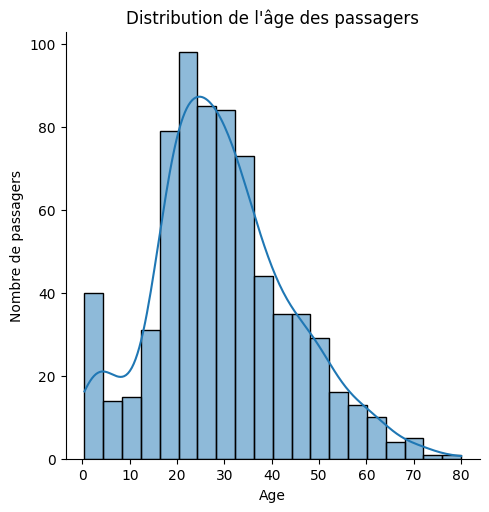

In [170]:
sns.displot(data_clean, x="Age", fill=True, kde=True)
plt.title("Distribution de l'âge des passagers")
plt.ylabel("Nombre de passagers")
plt.show()

Q1.3: Enoncer une hypothèse nulle et une hypothèse alternative considérant la ou les variables identifiées.

**Hypothèse nulle :** L'âge moyen des passagers du Titanic est égal à l'âge moyen de la population en 1912 (donc 28 ans). H0 : μ = 28   
**Hypothèse alternative :** L'âge moyen des passagers du TItanic est différent de l'âge moyen de la population en 1912 (donc 28 ans). H1 : μ =/= 28



Q1.4: Identifier le test statistique approprié selon les hypothèses énoncées.



Nous devons réaliser un t-test pour un échantillon afin de comparer la moyenne de l'âge de notre échantillon à celle de la population de 1912, étant donné que nous n'avons pas la variance de la population.

Q1.5: Vérifier la validation des assumptions selon le test identifié.  
Pour le t-test, il s'agit des assomptions suivantes:  
- Echantillon aléatoire
- Taille de l'échantillon > 30 ou population normalement distribuée

Selon nous, l'échantillon est **aléatoire**. Il représente une partie des passagers et on estime qu'ils ont eu une chance égale d'y être inclus.   
Un doute se pose sur le pré-traitement que nous avons effectué: est-ce qu'en supprimer les lignes avec au moins une valeur manquante biaise le test ? On constate que les valeurs non renseignées concernent majoritairement l'âge des passagers de 3e classe.  
  
La taille de l'échantillon est largement supérieure à 30 

In [171]:
# Combien de passagers ont été enlevés dans le data set "clean", par catégorie ?
missing_values_by_class = data.groupby("Pclass", group_keys=False).apply( lambda x: x.isna().sum()[~x.isna().sum().index.isin(["PassengerId", "Cabin"])])

print("Répartition des valeurs manquantes par classe de passager :")
print(missing_values_by_class)


Répartition des valeurs manquantes par classe de passager :
        Survived  Pclass  Name  Sex  Age  SibSp  Parch  Ticket  Fare  Embarked
Pclass                                                                        
1              0       0     0    0   30      0      0       0     0         2
2              0       0     0    0   11      0      0       0     0         0
3              0       0     0    0  136      0      0       0     0         0


C:\Users\marino casagranda\AppData\Local\Temp\ipykernel_5500\1970987710.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_values_by_class = data.groupby("Pclass", group_keys=False).apply( lambda x: x.isna().sum()[~x.isna().sum().index.isin(["PassengerId", "Cabin"])])


Q1.6: Calculer la statistique ainsi que la p-valeur.


In [172]:
mean_age = 28 # moyenne supposée

sample_size_age = len(data_clean["Age"]) 
sample_mean_age = np.mean(data_clean["Age"]) #moyenne 
sample_std_age = np.std(data_clean["Age"], ddof=1) #écart type
print ("Moyenne de l'âge sur le titanic :", sample_mean_age)


# Statistique t
t = (sample_mean_age - mean_age)/(sample_std_age / np.sqrt(sample_size_age))
print("Statistique t :", t)

# P-valeur
p_value = stats.t.cdf(-abs(t), df=sample_size_age-1) * 2
print("P-valeur :", p_value)

Moyenne de l'âge sur le titanic : 29.64209269662921
Statistique t : 3.0233009800374053
P-valeur : 0.002590259537786662


Q1.7: Prendre une décision à partir de la p-valeur et d'un seuil alpha de 5%.

In [173]:
alpha = 0.05

if p_value < alpha:
    print("On rejette l'hypothèse nulle.")
else:
    print("On ne rejette pas l'hypothèse nulle.")

On rejette l'hypothèse nulle.


Q1.8: Interpréter le résultat et évaluer la taille de l'effet.

**Taille de l'effet:**

In [174]:
cohen_d = (sample_mean_age - mean_age) / sample_std_age
print("Taille de l'effet (Cohen's d) :", cohen_d)


if abs(cohen_d) < 0.2:
    print("Interprétation : Effet faible.")
elif abs(cohen_d) < 0.5:
    print("Interprétation : Effet modéré.")
elif abs(cohen_d) < 0.8:
    print("Interprétation : Effet moyen.")
else:
    print("Interprétation : Effet fort.")

Taille de l'effet (Cohen's d) : 0.11330299449551398
Interprétation : Effet faible.


**Interprétation**  
On constate une différence statistiquement significative entre l’âge moyen des passagers, 29.6 ans, et celui de la population mondiale en 1912, 28 ans.   
Avec une **statistique t de 3.02** et une **p-valeur de 0.0026**, on **rejette l’hypothèse nulle** selon laquelle les moyennes d'âges citées sont égales.  
Par contre, cette différence est d’une faible ampleur comme le démontre la **taille de l’effet, évaluée à 0.113**. En résumé, l’écart n’a pas vraiment d’importance notable.

De plus, le pré-traitement, lors duquel nous avons supprimé les lignes avec des valeurs manquantes, pourrait avoir introduit un biais. Les âges manquants concernent majoritairement les passagers de 3ᵉ classe, population constituée d'une population souvent plus jeune (Boxplot ci-dessous). L’exclusion de ces données pourrait avoir entraîné une surestimation de l’âge moyen de l’échantillon.
 
Bien que le test montre une différence significative, nous jugeons celle-ci trop faible dans la réalité.

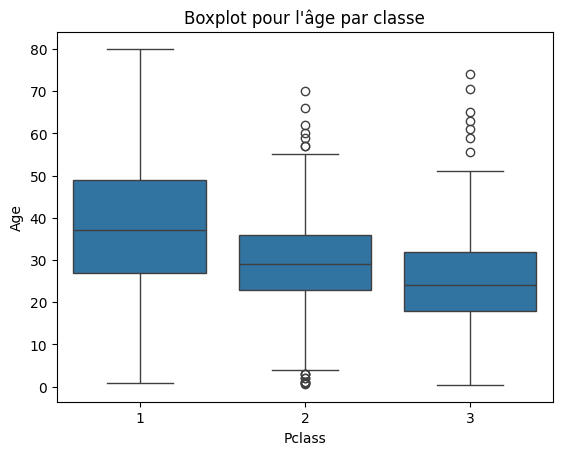

In [175]:
sns.boxplot(
    data=data_clean,
    x="Pclass",
    y="Age",
)
plt.title("Boxplot pour l'âge par classe")
plt.show()

**Q2: La survie dépend-elle de la classe du passager?**
==============


Q2.1: Identifier la ou les variables d'intérêt et spécifier le type.

**Variable**: Pclasss et Survived.   
**Type:** Pclass est qualitative ordinale. Survived est qualitative nominale.


Q2.2: Réaliser une visualisation appropriée selon la ou les variables.


Passagers ayant survécu par classe

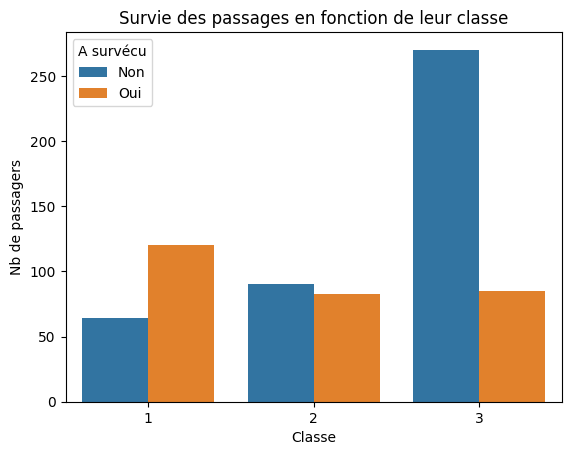

In [176]:
sns.countplot(
    data=data_clean,
    x="Pclass",
    hue="Survived"
)
plt.title("Survie des passages en fonction de leur classe")
plt.xlabel('Classe')
plt.ylabel('Nb de passagers')
plt.legend(title='A survécu', labels=['Non', 'Oui'])
plt.show()

Pourcentage de passagers ayant survécu par classe

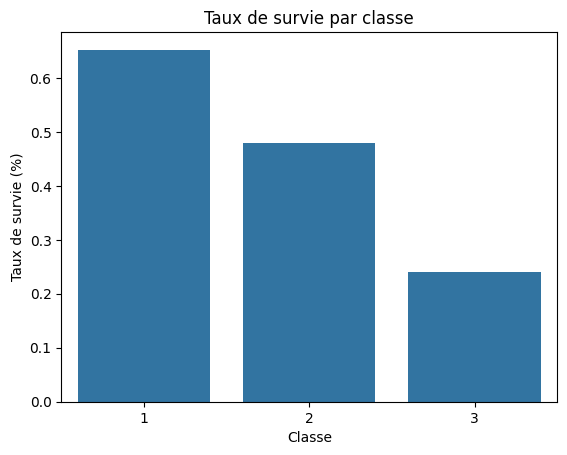

In [177]:
sns.barplot(
    data=data_clean,
    x="Pclass",
    y="Survived",
    errorbar=None
)
plt.title("Taux de survie par classe")
plt.xlabel('Classe')
plt.ylabel('Taux de survie (%)')
plt.show()


Q2.3: Enoncer une hypothèse nulle et une hypothèse alternative considérant la ou les variables identifiées.

**Hypothèse nulle :** La survie ne **dépend pas** de la classe des passagers.   
**Hypothèse alternative :** La survie **dépend** de la classe des passagers. 


Q2.4: Identifier le test statistique approprié selon les hypothèses énoncées.



Le test Chi-carré d’indépendance est parfait puisqu'il permet de tester la dépendance entre les variables Pclass et Survived.



Q2.5: Vérifier la validation des assumptions selon le test identifié.

Pour le test de Chi-carré, il s'agit des assomptions suivantes:  
- Echantillons aléatoires
- Pour chaque combinaison des niveaux des variables, nous avons besoin d’au moins 5 valeurs.
  
Les échantillons sont aléatoires.
Nous avons plus de 50 valeurs par combinaisons.  

In [178]:
contingency_table = pd.crosstab(data_clean["Pclass"], data_clean["Survived"])

print("Table de contingence :")
print(contingency_table)

min_value = contingency_table.values.min()

# Vérification manuelle because why not, juste histoire de l'afficher
if min_value >= 5:
    print("\nChaque combinaison a au moins 5 valeurs. Le critère est validé.")
else:
    print("\nNope, critère n'est pas validé.")


chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print("\nValeur de Chi2 :", chi2)
print("P-valeur :", p_value)
print("Degrés de liberté :", dof)
print("Effectifs théoriques :", expected)

Table de contingence :
Survived    0    1
Pclass            
1          64  120
2          90   83
3         270   85

Chaque combinaison a au moins 5 valeurs. Le critère est validé.

Valeur de Chi2 : 91.08074548791019
P-valeur : 1.6675060315554636e-20
Degrés de liberté : 2
Effectifs théoriques : [[109.57303371  74.42696629]
 [103.02247191  69.97752809]
 [211.40449438 143.59550562]]


Q2.6: Calculer la statistique ainsi que la p-valeur.


In [179]:
chi2, p_value, dof, _ = stats.chi2_contingency(
    pd.crosstab(data_clean["Pclass"], data_clean["Survived"])
)
effect_size = np.sqrt(chi2 / (data_clean.shape[0] * (min(data_clean.shape) - 1)))

print("La statistique chi2 est de : " + str(chi2))
print("La p-valeur associée est de : " + str(p_value))
print("Le degré de liberté est de : " + str(dof))

La statistique chi2 est de : 91.08074548791019
La p-valeur associée est de : 1.6675060315554636e-20
Le degré de liberté est de : 2


Q2.7: Prendre une décision à partir de la p-valeur et d'un seuil alpha de 5%.

In [180]:
alpha = 0.05

if p_value < alpha:
    print("On rejette l'hypothèse nulle.")
else:
    print("On ne rejette pas l'hypothèse nulle.")

On rejette l'hypothèse nulle.


Q2.8: Interpréter le résultat et évaluer la taille de l'effet.

In [181]:
# Cramer's V
V = np.sqrt(chi2 / data_clean.shape[0])
print("Valeur de V de Cramer :", V)

Valeur de V de Cramer : 0.35766240415815087


Le V de Cramer est une mesure de la taille d'effet pour le test d'indépendance du khi-carré. Sa valeur varie entre 0 (aucune association) et 1 (association parfaite). En dessous de 0.1, on estime que c'est une faible association. Entre 0.1 et 0.3, association modérée et en dessus de 0.3, on parle d'une forte association


  

**Interprétation**  
On estime donc qu'avec 0.35766240415815087, il existe une relation non négligeable entre Pclass et Survived.  
Cela indique que la classe a un impact significatif sur les chances de survie, probablement à cause de facteurs comme l'accès aux canots de sauvetage ou la localisation des cabines.  
On peut l'expliquer car les passagers de 3e classe étaient des cabines situées dans les ponts inférieurs, où l'eau s'est infiltrée en premier.  
A l'époque, il y avait aussi des portes qui séparaient les classes. Cela a du retarder leur progression si certaines se sont bloquées.

**Q3: Existe-t-il une différence d'âge entre les passagers qui ont survécu et les passagers décédés?**
==============


Q3.1: Identifier la ou les variables d'intérêt et spécifier le type.  
**Survived** = Qualitative nominale  
**Age** = Quantitative continue

Q3.2: Réaliser une visualisation appropriée selon la ou les variables.


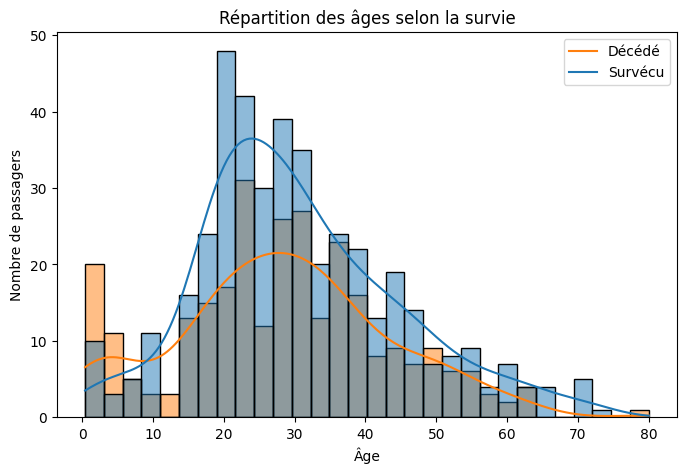

In [182]:
plt.figure(figsize=(8,5))
sns.histplot(data=data, x="Age", hue="Survived", bins=30, alpha=0.5, kde=True)


plt.xlabel("Âge")
plt.ylabel("Nombre de passagers")
plt.title("Répartition des âges selon la survie")
plt.legend(labels=["Décédé", "Survécu"])

Q3.3: Enoncer une hypothèse nulle et une hypothèse alternative considérant la ou les variables identifiées.

**Hypothèse nulle** : la moyenne d'âge des passager ayant survécu est  égale à celle des passagers décédés  
**Hypothèse alternative** :la moyenne d'âge des passager ayant survécu n'est pas  égale à celle des passagers décédés 

Q3.4: Identifier le test statistique approprié selon les hypothèses énoncées.



Le t-test à deux échantillons semble appoprié, il permettra de comparé la moyenne d'âge des personnes décédéées avec la moyenne d'âge des survivants

Q3.5: Vérifier la validation des assumptions selon le test identifié.

1. Les échantillons sont aléatoires:
Nous ne pouvons pas vérifier que l'échantillon fourni est aléatoire au sens statistique du terme, mais nous partons du princips que le set de données fourni est représenttif de la population du titanique et qu'il est donc recevable en tant qu'échantillon aléatoire.

2. Les échantillons sont indépendants: 
Les échantillons sont indépendant, en effet , il est impossible d'avoir à la fois succombé et survécu au naufrage.

3. La taille des l'échantillon est supérieur à 30: 
Les échantillons ont les deux une taille supérieure à 30

Q3.6: Calculer la statistique ainsi que la p-valeur.


In [183]:
group_survived = data_clean[data_clean["Survived"] == 1]["Age"]
group_died = data_clean[data_clean["Survived"] == 0]["Age"]

t, p_valeur = stats.ttest_ind(
    group_survived,
    group_died,
    alternative="two-sided",
    equal_var=False
)

print("La statistique t est de : " + str(t))
print("La p-valeur associée est de : " + str(p_valeur))

La statistique t est de : -2.184486214939826
La p-valeur associée est de : 0.02931497754601072


Q3.7: Prendre une décision à partir de la p-valeur et d'un seuil alpha de 5%.

Le but est de définir si la p-valeur est statistiquement significative.
alpha = (0.05)
p-valeur= 0.0293

la p-valeur est plus petite que alpha donc l'hypothèse nulle est rejetée.

Cela signifie que la différence d'âge entre les survivants et les personnes ayant succommbé est significative.

Q3.8: Interpréter le résultat et évaluer la taille de l'effet.

On va effectuer le test du d de Cohen pour nous aider à intérpréter les résultats

In [184]:
mean_survivants = group_survived.mean()
mean_décédés = group_died.mean()
std_survivants = group_survived.std()
std_décédés = group_died.std()
n_survivants = len(group_survived)
n_décédés = len(group_died)


sp = np.sqrt(((n_survivants - 1) * std_survivants**2 + (n_décédés - 1) * std_décédés**2) / (n_survivants + n_décédés - 2))


d_cohen = (mean_survivants - mean_décédés) / sp


print(f"Moyenne d'âge des survivants : {mean_survivants:.2f} ans")
print(f"Moyenne d'âge des décédés : {mean_décédés:.2f} ans")
print(f"d de Cohen : {d_cohen:.4f}")


if abs(d_cohen) < 0.2:
    interpretation = "Effet très faible (quasi négligeable)."
elif abs(d_cohen) < 0.5:
    interpretation = "Effet faible."
elif abs(d_cohen) < 0.8:
    interpretation = "Effet modéré."
else:
    interpretation = "Effet fort."

print(f"Interprétation : {interpretation}")


Moyenne d'âge des survivants : 28.19 ans
Moyenne d'âge des décédés : 30.63 ans
d de Cohen : -0.1683
Interprétation : Effet très faible (quasi négligeable).


On voit qu'il y a une différence statistiquement significative entre  la moyenne d'âge des survivants et la moyenne d'âge des morts grâce au t-test.
 cependant il semblerait que cette écart de moyenne d'âge entre les passagers morts et les survivants ne montre pas une relation claire en l'âge d'une personne et sa survie. Il semble donc que l'âge d'une personne n'ai pas influencé ses chances de survie.
 En regardant le graphe de répartition à la Question 3.2, l'on remarque cependant que la courbe des personnes décédées ayant entre 0 et environ 5 ans semble ne pas correspondre au schéma du reste de la répartition. l'on peut donc probablement en déduire que l'âge des personnes n'influençaient pas leur chances de survie, excepté pour les jeunes enfants d'environ 5 ans et moins, qui avaient beaucoup plus de chances de décédés que les autres tranches d'âges.

**Q4: Existe-t-il une relation entre l'âge des passagers et le prix des billets?**
==============


Q4.1: Identifier la ou les variables d'intérêt et spécifier le type.

**Age** : Quantitative et continue  
**Fare**: Quantitative et continue

Q4.2: Réaliser une visualisation appropriée selon la ou les variables.


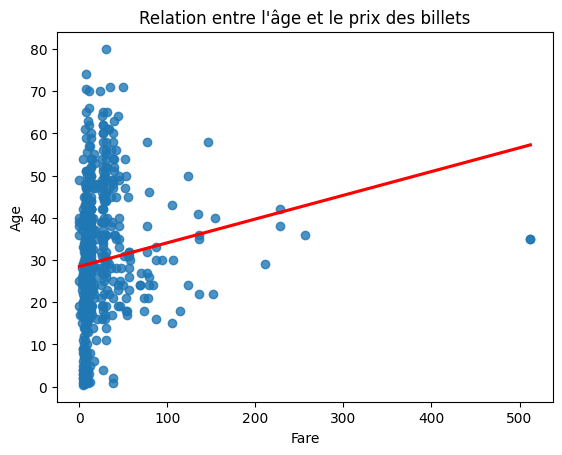

In [185]:
sns.regplot(
    data=data_clean,
    x="Fare",
    y="Age",
    ci=None,
    line_kws={"color": "red"}
)
plt.title("Relation entre l'âge et le prix des billets")
plt.show()

Q4.3: Enoncer une hypothèse nulle et une hypothèse alternative considérant la ou les variables identifiées.

**Hypothèse nulle** = Il n'existe pas de relation entre l'âge des passagers et le prix du billet  
**Hypothèse alternative** = il existe une relation entre l'âge des passagers et le prix du billet

Q4.4: Identifier le test statistique approprié selon les hypothèses énoncées.



On va effectuer un test de corrélation (permettant d'identifier la correlation entre deux variables quantitatives).

Q4.5: Vérifier la validation des assumptions selon le test identifié.

Les 2 variables doivent être quantitatives. oui 
Les données doivent être approximativement liées linéairement. difficile à dire sur le boxplot... mais peut être pas
Les résidus de la régression linéaire sont indépendants oui
Les résidus de la régression linéaire sont normalement distribués on va partit du principe que oui pour l'exercice
Les résidus de la régression linéaire sont distribuées de façon homogène on va partir du principe que oui pour l'exercice

Q4.6: Calculer la statistique ainsi que la p-valeur.


In [186]:
corr = data_clean.corr()["Age"]["Fare"]
print("La corrélation entre l'age et le prix des billets est de : " + str(corr))

La corrélation entre l'age et le prix des billets est de : 0.14563315923055964


In [187]:
corr, p_value = stats.pearsonr(data_clean["Fare"], data_clean["Age"])

print(f"Coefficient de corrélation : {corr:.4f}")
print(f"P-valeur : {p_value:.4f}")


Coefficient de corrélation : 0.1456
P-valeur : 0.0001


Q4.7: Prendre une décision à partir de la p-valeur et d'un seuil alpha de 5%.



Coefficient de corrélation (r) = 0.1456
P-valeur = 0.0001
Seuil alpha = 0.05

Cela signifie que nous rejetons l'hypothèse nulle. 

Q4.8: Interpréter le résultat et évaluer la taille de l'effet.

Il existe une corrélation entre l'age des passagers et le prix du billets. cependant, la coéfficient de corrélation de 0.1456 montre que cette corrélation est extrêmement faible. On peut deviner sur le graphique de la question 4.3 qu'il y a une très très légère tendance à ce que le prix du billet augmente avec l'âge. cette tendance est cependant minuscule. 

Une des hypothèse de cette légère tendance pourrait être: de manière générale on peut imaginer que l'on s'enrichit avec l'âge (quand on est étudiant on a en général moins d'argent qu'en début de carrière, et en débur de carrière on a en général moins d'argent qu'en fin de carrière. il est donc possible que les passagers des classes supérieures (ayant donc payé leur billets plus chers) aient été en moyenne un peu plus agés que les passagers des classes inférieures. Bien sûr, cela n'est qu'une hypothèse.

D'autres facteurs influenceraient probablement plus le prix du billet des passagers (comme leurs revenus par exemple)

De plus il faut noter que nous ne somme pas sûrs que notre test de corrélation respecte toutes les assumptions. Notre résultat est donc à analyser avec prudence

## 3. Data mining (2 pts)

**Q1: Effectuer une analyse statistique à l'aide de la régression logistique avec comme variable dépendente la variable `Survived`. Interpréter les coefficients et discuter de leur importance statistique en vous appuyant sur leur p-valeur.**

La variable dépendante Y est Survived (0 = mort, 1 = survécu)

Les variables indépendantes X sont le reste des données.

In [188]:
X = data_clean.drop(columns=["Survived"])
y = data_clean["Survived"] 

# constante
X = sm.add_constant(X)

In [189]:
# Notre modèle de rég. logistique
model = sm.Logit(
    y, X
)

# Fit le model
model_fit = model.fit()

print(model_fit.summary())

Optimization terminated successfully.
         Current function value: 0.445519
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      704
Method:                           MLE   Df Model:                            7
Date:                Thu, 30 Jan 2025   Pseudo R-squ.:                  0.3398
Time:                        23:39:18   Log-Likelihood:                -317.21
converged:                       True   LL-Null:                       -480.45
Covariance Type:            nonrobust   LLR p-value:                 1.324e-66
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.7251      0.659      8.691      0.000       4.434       7.016
Pclass        -1.1795      0.

Ce premier "test" nous donne les infos suivantes:  
- Le coef qui définit l'impact des variables sur la survie  
- La p-valeur (quelle donnée est significative ?)
- Pseudo R-squ. Cette valeur indique le % de variabilité de Y qui provient de nos variables indépendantes X. L'objectif sera de retirer des variables moins importantes dans la prochaine régression, tout en conservant cet indicateur le plus proche de 33.98% actuels.

Selon leur p-valeur, nous avons déterminé que les variables suivantes sont les plus importantes:
*Sex_male*, *Pclass*, *Age*, *FamilySize*

Donc on refait une nouvelle régression avec ces valeurs :

In [190]:
x = data_clean.drop(columns=["Survived","Fare","Embarked_Q","Embarked_S"])
y = data_clean["Survived"]

x["Sex_male"] = x["Sex_male"].astype(int)

X = sm.add_constant(x)

model = sm.Logit(
    y, X
)
model_fit = model.fit()
print(model_fit.summary())




Optimization terminated successfully.
         Current function value: 0.448632
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      707
Method:                           MLE   Df Model:                            4
Date:                Thu, 30 Jan 2025   Pseudo R-squ.:                  0.3352
Time:                        23:39:18   Log-Likelihood:                -319.43
converged:                       True   LL-Null:                       -480.45
Covariance Type:            nonrobust   LLR p-value:                 1.891e-68
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.7336      0.574      9.995      0.000       4.609       6.858
Pclass        -1.2993      0.

Les p-valeurs sont toutes inférieures au seuil de 0.05, ce qui indique que les variables ont toutes un impact jugé *significatif* sur la survie.  
De plus, le Pseudo R-squ. se situe à 33.52%. Cette faible diminution de 0.46% nous prouve qu'on a bien retiré des variables peu importantes.

**Visualisation de l'impact des variables (les coef):**  
Plus le coefficient est élevé en valeur absolue, plus il aura d'impact. *Tous nos coefficients sont négatifs*, ce qui signifie qu'ils impactent négativement la survie.  
En résumé, *plus la valeur de la variable sera élevée* (par exemple 80 ans pour l'âge), plus les chances de survie seront faibles.  
Cela semble logique mais la Pclass est contre-intuitive puisque l'augmentation de la variable (1<2<3) est en fait une diminution de la classe dans la vie réelle (1>2>3).

Dans la visualisation ci-dessous, on voit clairement que le sexe du passager aura le plus grand impact, suivi par la classe du passager.   
En résumé, le fait d'être un homme a un impact négatif fort sur la survie, ce qui est logique quand on connaît les mesures d'évacuation prévue en cas de naufrage (femmes avant les hommes).  
Concernant la classe, plusieurs hypothèses s'offrent à nous telles que la barrière de la langue (beaucoup de passagers de 3e classe étaient des immigrants ne parlant pas forcément anglais) qui a pu provoquer des incompréhensions lors de l'évacuation ou encore l'accès au canot, puisque la zone de la première classe se situait proche des canots de sauvetages.  

La taille de la famille et l'âge sont des variables qui restent impactantes mais dans une moindre mesure.  

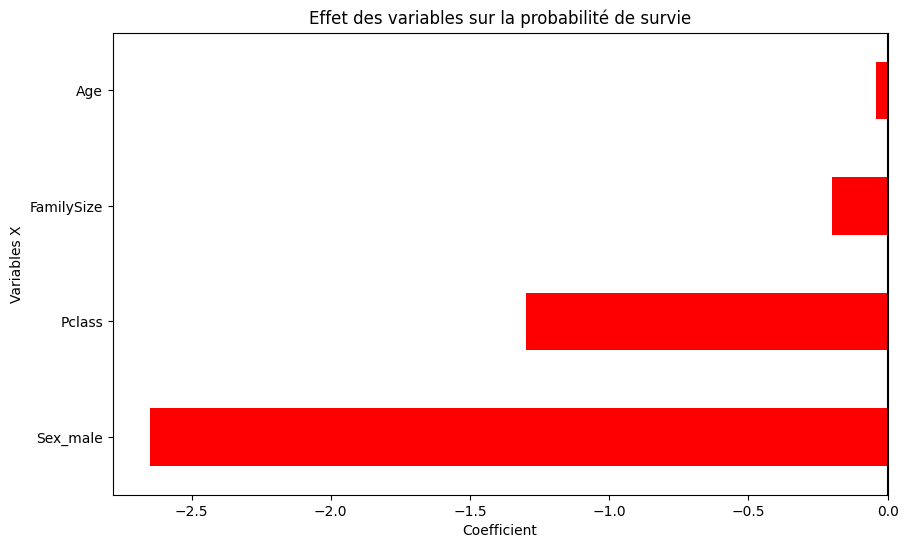

In [191]:
coefficients = model_fit.params
plt.figure(figsize=(10, 6))
coefficients.drop("const").sort_values().plot(kind='barh', color=['red' if x < 0 else 'green' for x in coefficients.drop("const")]) # On enlève la constante pour un visuel plus clair
plt.axvline(x=0, color='black', linestyle='-') 
plt.title("Effet des variables sur la probabilité de survie")
plt.xlabel("Coefficient")
plt.ylabel("Variables X")
plt.show()

**Q2: Effecter une analyse statistique à l'aide d'un arbre de classification avec comme variable dépendente la variable `Survived` et une profondeur maximale de 4. Visualiser l'arbre et expliquer quelques décisions.**

Nous allons maintenant générer un arbre à partir des des variables de l'exercice précédent.

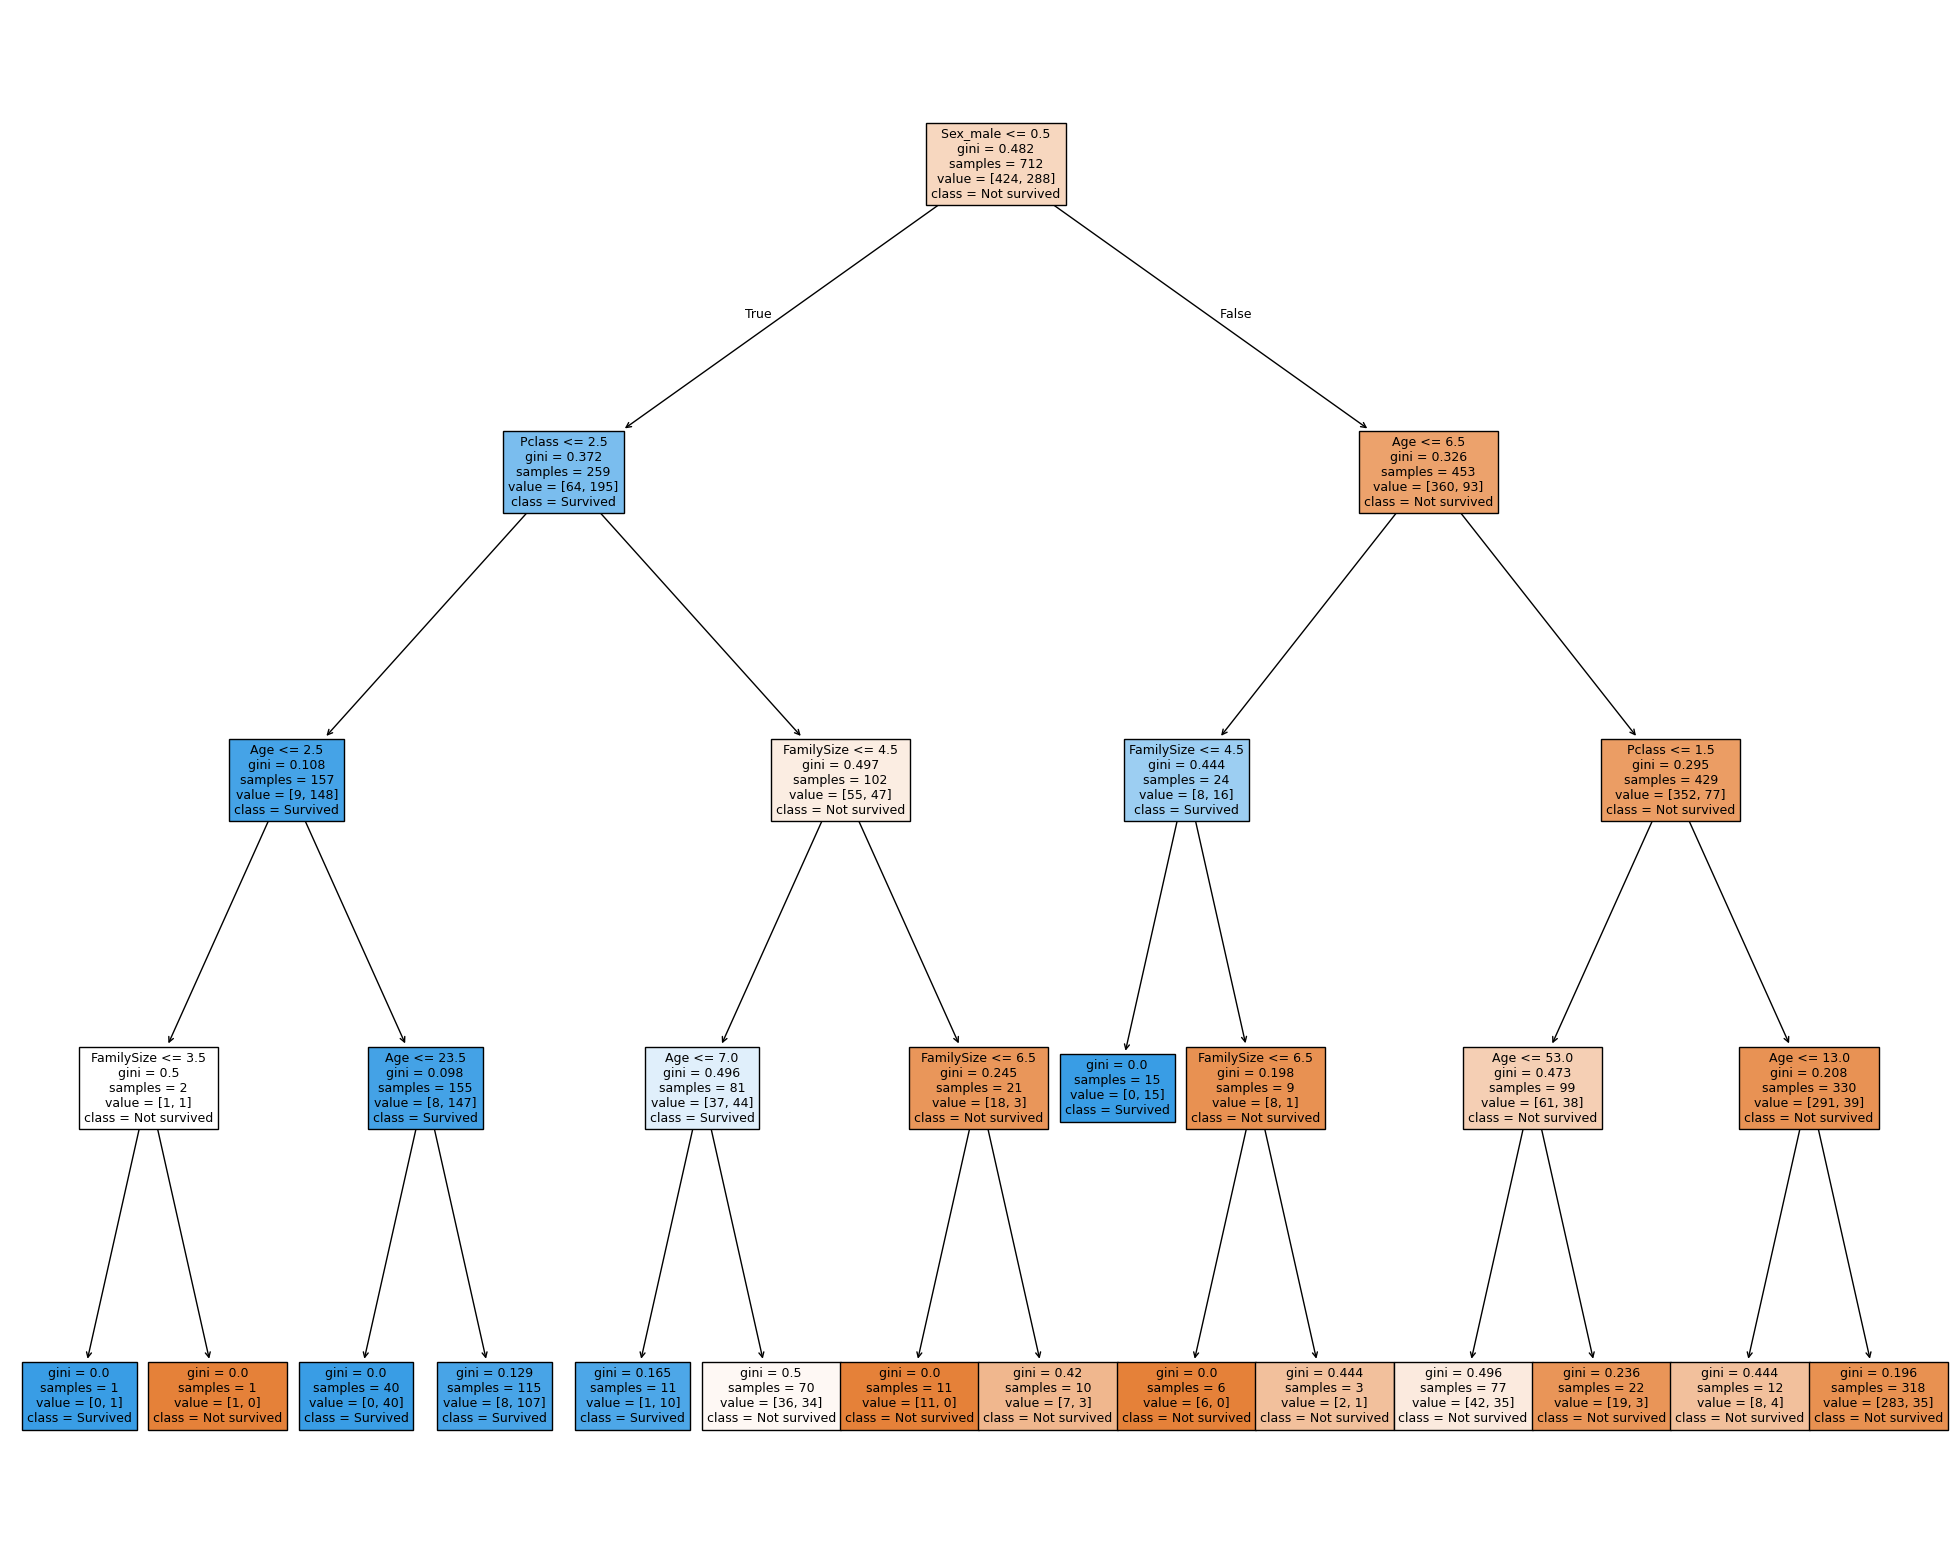

In [192]:
model = DecisionTreeClassifier(max_depth=4)
model_fit = model.fit(X, y)

fig = plt.figure(figsize=(25, 20))
_ = plot_tree(
    model,
    feature_names=X.columns.tolist(),
    class_names=["Not survived", "Survived"],
    filled=True
)

Dans cet arbre, on commence par séparer les hommes des femmes. Si Sex_male est < ou = 0.5 (donc une femme), on va à gauche. Si c'est un homme on part à droite.  
La classe est également très déterminante, on voit que les passagers de 3e classe (Pclasse est > 2.5) ont de grandes chances de ne pas survirvre -> sauf si d'autres conditions comme l'âge sont en leur faveur (rappel: "femmes et **enfants** d'abord").  
La variable la plus déterminante est donc le sexe, puis en fonction du sexe, l'âge ou la classe des passagers.

**Conclusion: Interpréter les résultats des deux analyses statistiques et résumer les points importants de votre étude.**

On remarque clairement que le sexe est la variable la plus déterminante, suivie de la classe du passager.  
Pour être plus précis, on voit sur l'arbre que le sexe est la première séparation -> ce qui démontre un plus grand impact.  

Ensuite, on remarque que les jeunes filles et enfants ont plus de chances de survivre (double favoritisme "Femmes et enfants d’abord").  
En effet, la Pclass <= 2.5 puis l'Age <= 23.5 montre que *les jeunes filles (3 à 23.5 ans) en 1ère et 2ème classe ont toutes survécu*.   
Plus généralement, *les femmes ne provenant pas de la 3e classe* ont un très haut taux de survie. En fait, 148 sur 157 ont survécu.  

A l'inverse, la majorité des décès a eue lieu dans la classe des hommes de 2 ou 3e classe de plus de 13 ans, soit les hommes n'étant plus considérés comme des enfants, mais non issus de la 1ère classe.   
Fait intéressant pour les **hommes de plus de 6,5 ans**:  il y a eu pratiquement autant de *survivants* chez les hommes de 1ère classe (38) que chez les hommes de 2e et 3e classe (39)... alors qu'il y avait **99** hommes en 1ère classe contre **330** dans les classes 2 et 3. La classe joue donc un rôle très important dans la survie chez les hommes.  

Pour conclure: Le sexe est la variable la plus déterminante, suivie par la classe et enfin l'âge.   
On retrouve les extrêmes de ces combinaisons:  
- Chez les jeunes femmes (3 à 23.5 ans) de 1ère et 2e classe: **100% de survivants** (40/40)
- Chez les hommes et jeunes hommes (plus de 13 ans) de 2e et 3e classe: **88.99% de décès** (283/318)